In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import random
np.random.seed(1001)
random.seed(1001)

# Create parameters

In [3]:
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution with limited memory $m$

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 150
memory = [20, 30, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m, minorant_update='drop_constr', print_freq=10)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 20


k=0, rel_gap=inf, L=-2472.706641209428, U=3936.4781972599376, L0=-2472.706641209428
k=10, rel_gap=inf, L=-385.28503319299557, U=2.08903090403669, L0=-385.28503319299557
k=20, rel_gap=0.7709173491558531, L=-171.52239062951548, U=-96.85510772779736, L0=-171.52239062951548
rho=117.59802709653134
k=30, rel_gap=0.349865173686069, L=-137.06946319941312, U=-101.54307694680227, L0=-137.06946319941312
k=40, rel_gap=0.12521737498366806, L=-123.20930447853789, U=-109.49822427006711, L0=-123.20930447853789
k=50, rel_gap=0.04393444828349498, L=-116.30523355518017, U=-111.41047576925621, L0=-271.7439881917744
k=60, rel_gap=0.04393444828349498, L=-116.30523355518017, U=-111.41047576925621, L0=-137.18117673468169
k=70, rel_gap=0.04094005698532067, L=-116.30523355518017, U=-111.730961619455, L0=-123.49630976355638
k=80, rel_gap=0.040531168344311815, L=-116.30523355518017, U=-111.7748675806074, L0=-149.94783766139517
k=90, rel_gap=0.028410139891315037, L=-115.39929942662002, U=-112.21135901948196, L0=-1

# Centralized solution

In [6]:
h_cvx = ob.cvx_supply_chain(params=params)[0]
print(f"{h_cvx=}")

h_cvx=-112.56431835964304


# Plot

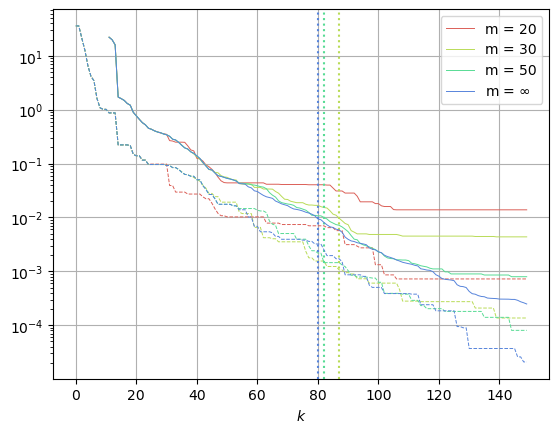

In [8]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='sc_fin_memory_drop.pdf')